<a href="https://colab.research.google.com/github/Rohit-Roby/Project/blob/main/04_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip3 install --upgrade setuptools
# !pip3 install --upgrade pip
# !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'
# !pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113b


In [1]:
!pip install trimesh --quiet
!pip install --upgrade objaverse
!pip install pygltflib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.8/693.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7394 sha256=48141991bb1cc754f901b563601c20712822088f3ad3f1fdf73de92a57e546cf
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.0 MB/s eta 0:00:00
  Created wheel for pygltflib: filename=pygltflib-1.16.2-py3-none-any.whl size=27300 sha256=2c2f867ca88e7665ba798b31410e40373560554ae20cb6135571e6e9085a007a
  Stored in directory: /root/.cache/pip/wheels/4a/95/a2/2ee16c602170b0601ebeddbf06597868f09b7dbb0495ae99c4
Successfully built pygltflib


In [2]:
import os
import torch
import trimesh
# import torchvision
import objaverse as obx
# obx.__version__

loading uids for each 3d model

In [3]:
uids = obx.load_uids()
len(uids), type(uids)

(798759, list)

loading the annotations for each models using their respective uids

In [4]:
annotations = obx.load_annotations(uids)

 99%|█████████▉| 159/160 [01:54<00:00,  1.39it/s]


retriving all the 3d images related to places and travel environment

In [5]:
place_travel_uids = [uid for uid, annotation in annotations.items() if (len(annotation["tags"]) > 0  and (annotation["tags"][0]['name'] == 'places' or annotation["tags"][0]['name'] == 'travel'))]
place_travel_uids[:10]

['33e2ab5ed3804d21b78baefbd13f6ff3',
 'fed0fb8ebc2443e580cd36df4b521433',
 '64d9d5cf324e4890a9cf3ef0e29224d1',
 'f9b7be8237b94ac0aa0f042c462cd864',
 '39847201bf9f4338a76ba39a53b5da1f',
 '215383fee71b4f749692bac6c37bb262',
 '9279aeb764d448989c146b769cf4da69',
 'b0ec0b3bf68c446ca231f8a031a814b4',
 'b241713997a64c2a829f65723cedf03f',
 'a8056e7ad66f48c39b92e7abda6e9c45']

In [7]:
import pandas as pd

In [24]:
annotations[uids[0]]['archives']['glb']['textureCount'],annotations[uids[0]]['archives']['glb']['textureMaxResolution'],annotations[uids[0]]['archives']['glb']['faceCount'],annotations[uids[0]]['archives']['glb']['vertexCount']


(6, 1024, 14337, 19008)

In [8]:
df = pd.DataFrame()
# type(df)
df['uids'] = place_travel_uids
# for uid in uids:
# df.shape

In [58]:
for slug in annotations[uids[0]]['tags']:
  print(slug['name'])


stair
staircase
staircon


In [48]:
import multiprocessing
processes = multiprocessing.cpu_count()
processes

2

In [50]:
objects = obx.load_objects(
    uids = df['uids'],
    download_processes = processes
)

In [62]:
def slug_list(tags):
  list = []
  for slug in tags:
    list.append(slug)
    print(slug)
  # return list

In [60]:
slug_list(annotations[uids[0]]['tags'])

[{'name': 'stair',
  'slug': 'stair',
  'uri': 'https://api.sketchfab.com/v3/tags/stair'},
 {'name': 'staircase',
  'slug': 'staircase',
  'uri': 'https://api.sketchfab.com/v3/tags/staircase'},
 {'name': 'staircon',
  'slug': 'staircon',
  'uri': 'https://api.sketchfab.com/v3/tags/staircon'}]

In [63]:
for uid in df['uids']:
  # df['face_count'] = annotations[df['uids']]['archives']['glb']['faceCount']
  df['face_count'] = df['uids'].map(lambda x: annotations[x]['archives']['glb']['faceCount'] if x in annotations else None)
  df['vertex_count'] = df['uids'].map(lambda x: annotations[x]['archives']['glb']['vertexCount'] if x in annotations else None)
  df['texture_count'] = df['uids'].map(lambda x: annotations[x]['archives']['glb']['textureCount'] if x in annotations else None)
  df['textureMaxResolution'] = df['uids'].map(lambda x: annotations[x]['archives']['glb']['textureMaxResolution'] if x in annotations else None)
  df['glb_path'] = df['uids'].map(lambda x: objects[x])
  df['tags'] = df['uids'].map(lambda x: [slug['name'] for slug in annotations[x]['tags']] if x in annotations else None)



In [65]:
df.to_csv('dataSet.csv', index='False')

In [64]:
df.head()


,uids,face_count,vertex_count,texture_count,textureMaxResolution,glb_path,tags
0,33e2ab5ed3804d21b78baefbd13f6ff3,149519,206571,15,512,/root/.objaverse/hf-objaverse-v1/glbs/000-012/...,"[places, places-travel, places-places-travel-t..."
1,fed0fb8ebc2443e580cd36df4b521433,313300,195972,13,4096,/root/.objaverse/hf-objaverse-v1/glbs/000-012/...,"[travel, thailand, places, places-travel]"
2,64d9d5cf324e4890a9cf3ef0e29224d1,0,393633,0,0,/root/.objaverse/hf-objaverse-v1/glbs/000-012/...,"[travel, story, postcard, storytelling]"
3,f9b7be8237b94ac0aa0f042c462cd864,127550,140647,0,0,/root/.objaverse/hf-objaverse-v1/glbs/000-114/...,"[travel, travel_bag]"
4,39847201bf9f4338a76ba39a53b5da1f,456889,761430,0,0,/root/.objaverse/hf-objaverse-v1/glbs/000-001/...,"[travel, v, places, architecture]"


from matplotlib import pyplot as plt
_df_23['face_count'].plot(kind='hist', bins=20, title='face_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['vertex_count'].plot(kind='hist', bins=20, title='vertex_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['texture_count'].plot(kind='hist', bins=20, title='texture_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['textureMaxResolution'].plot(kind='hist', bins=20, title='textureMaxResolution')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_27.groupby('uids').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_28.groupby('glb_path').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='face_count', y='vertex_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='vertex_count', y='texture_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='texture_count', y='textureMaxResolution', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['face_count'].plot(kind='line', figsize=(8, 4), title='face_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['vertex_count'].plot(kind='line', figsize=(8, 4), title='vertex_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['texture_count'].plot(kind='line', figsize=(8, 4), title='texture_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['textureMaxResolution'].plot(kind='line', figsize=(8, 4), title='textureMaxResolution')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['glb_path'].value_counts()
    for x_label, grp in _df_36.groupby('uids')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('uids')
_ = plt.ylabel('glb_path')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_37['uids'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_37, x='face_count', y='uids', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['glb_path'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='face_count', y='glb_path', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_39['uids'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_39, x='vertex_count', y='uids', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_40['glb_path'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_40, x='vertex_count', y='glb_path', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

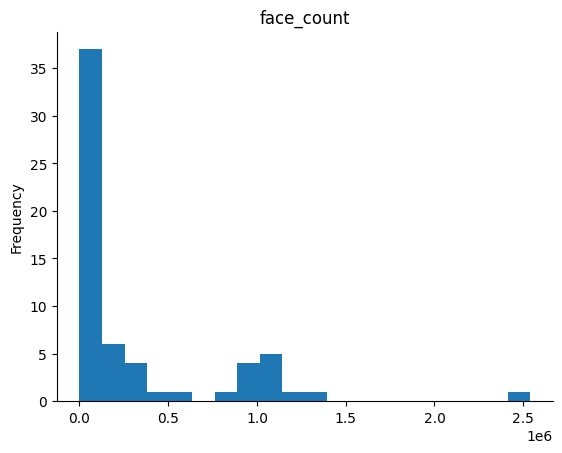

In [37]:
# @title vertex_count

from matplotlib import pyplot as plt
df['face_count'].plot(kind='hist', bins=20, title='face_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

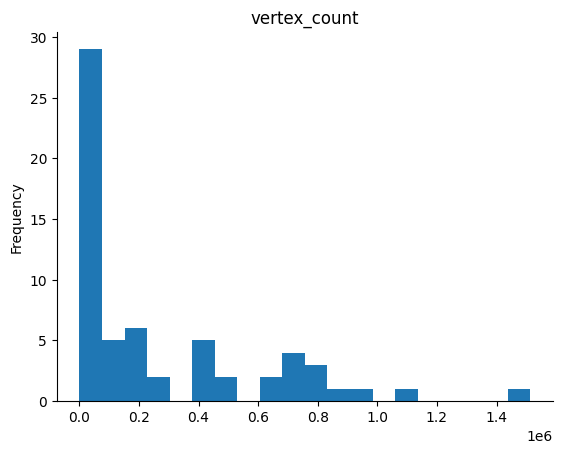

In [34]:
# @title vertex_count

from matplotlib import pyplot as plt
df['vertex_count'].plot(kind='hist', bins=20, title='vertex_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# import random
# random.seed(50)
# # uids = obx.load_uids()
# random_object_uids = random.sample(uids, 50)
# random_object_uids

In [ ]:
from pygltflib import GLTF2
from pygltflib import BufferFormat

In [ ]:
obj_path = []
def convert_glb_to_obj(glb_path):
  glb = GLTF2().load(glb_path)
  glb.convert_buffers(BufferFormat.BINARYBLOB)
  obj_filename = os.path.splitext(glb_path)[0] + ".obj"
  print(obj_filename)
  glb.save(obj_filename)
  return obj_filename

for glb_path in glb_paths:
  obj_path.append(convert_glb_to_obj(glb_path))

obj_path

In [67]:
df['glb_path'][0]

'/root/.objaverse/hf-objaverse-v1/glbs/000-012/33e2ab5ed3804d21b78baefbd13f6ff3.glb'

In [73]:
mesh = trimesh.load_mesh('/root/.objaverse/hf-objaverse-v1/glbs/000-012/33e2ab5ed3804d21b78baefbd13f6ff3.glb')
# mesh.show()
# print(adjacency_matrix)

In [74]:
type(mesh)

trimesh.scene.scene.Scene

In [ ]:
lvis_annotations = obx.load_lvis_annotations()
# lvis_annotations

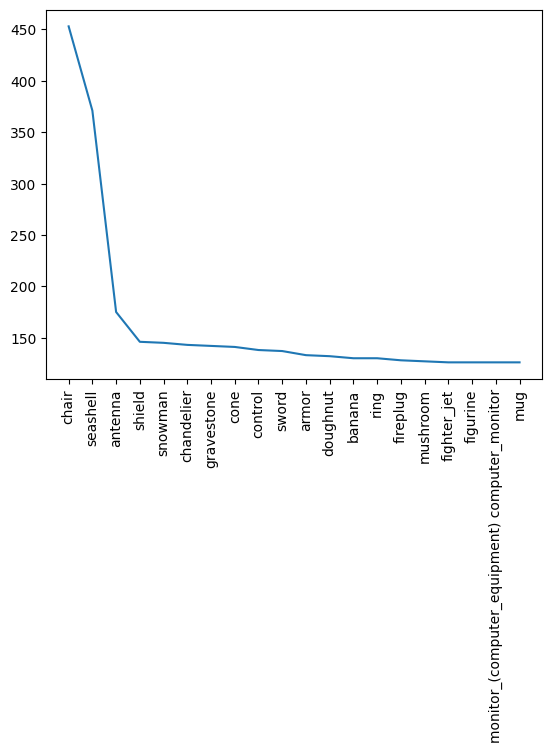

In [84]:
# Sort the dictionary by value in descending order and select the top 20 items
top_20_items = dict(sorted(lvis_annotations.items(), key=lambda item: len(item[1]), reverse=True)[:20])

# Plot the keys against the lengths of the values
plt.xticks(rotation='vertical')
plt.plot(list(top_20_items.keys()), [len(value) for value in top_20_items.values()])
plt.show()


In [87]:
# Reverse the dictionary
reversed_annotations = {uid: k for k, v in lvis_annotations.items() for uid in v}


In [90]:
for uid in df['uids']:
  df['category'] = df['uids'].map(lambda x: reversed_annotations[x] if x in reversed_annotations else None)


In [102]:
df = df.dropna().reset_index(drop=True)

In [103]:
df.to_csv('dataSet.csv')

### **preprocessing of 3d models**

In [97]:
# import trimesh
import numpy as np
import networkx as nx
from sklearn.preprocessing import MinMaxScaler

In [125]:
def load_mesh(file_path):
    # Load the GLB file
    try:
        scene = trimesh.load(file_path)
    except Exception as e:
        print(f"Error loading mesh: {e}")
        return None
    return scene

def extract_features(scene):
    # Check if the loaded object is a Scene
    if isinstance(scene, trimesh.Scene):
    # Iterate over each mesh in the scene
      for name, mesh in scene.geometry.items():
        # Now you can access the vertices, faces, etc. of each mesh
        vertices = mesh.vertices
        faces = mesh.faces

    # Create a graph from the mesh
    G = nx.Graph()
    G.add_nodes_from(range(len(vertices)))
    for face in faces:
        G.add_edge(face[0], face[1])
        G.add_edge(face[1], face[2])
        G.add_edge(face[2], face[0])

    # Compute the Laplacian matrix and its eigenvalues
    try:
        L = nx.normalized_laplacian_matrix(G)
        eigenvalues = np.linalg.eigvals(L.toarray())
    except np.linalg.LinAlgError:
        print("Error computing eigenvalues.")
        return None

    # Use the eigenvalues as features
    features = eigenvalues

    return features

# def extract_features(point_cloud):
#     # Extract points
#     points = point_cloud.points

#     # Compute features from points, such as the centroid
#     centroid = np.mean(points, axis=0)

#     # Use the centroid as a feature
#     features = centroid

#     return features

def preprocess_features(features):
    # Separate the real and imaginary parts of the features
    real_part = features.real.reshape(-1, 1)
    imag_part = features.imag.reshape(-1, 1)

    # Create a scaler for each part
    scaler_real = MinMaxScaler()
    scaler_imag = MinMaxScaler()

    # Normalize each part to the range [0, 1]
    real_part = scaler_real.fit_transform(real_part)
    imag_part = scaler_imag.fit_transform(imag_part)

    # Concatenate the real and imaginary parts along the second axis
    features = np.concatenate([real_part, imag_part], axis=1)

    return features



In [108]:
df.head()
df['glb_path'][0]

'/root/.objaverse/hf-objaverse-v1/glbs/000-114/f9b7be8237b94ac0aa0f042c462cd864.glb'

In [127]:
# Load the 3D model
mesh = load_mesh(df['glb_path'][0])
if mesh is not None:
    # Extract features
    features = extract_features(mesh)
    print(features)
    if features is not None:
        # Preprocess features
        features = preprocess_features(features)

# Assuming df is your DataFrame and 'glb_path' is the column with the paths to the GLB files
# for index, row in df.iterrows():
#     # Load the 3D model
#     mesh = load_mesh(row['glb_path'])
#     if mesh is not None:
#         # Extract features
#         features = extract_features(mesh)
#         if features is not None:
#             # Preprocess features
#             features = preprocess_features(features)

            # Add features to DataFrame
            # df.loc[index, 'features'] = features
        # Now, 'features' can be used as input to your GAN model


[-2.22044605e-16+0.00000000e+00j  1.33333333e+00+0.00000000e+00j
  1.66666667e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
 -2.22044605e-16+0.00000000e+00j  1.33333333e+00+0.00000000e+00j
  1.66666667e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
 -2.22044605e-16+0.00000000e+00j  1.33333333e+00+0.00000000e+00j
  1.66666667e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
 -2.22044605e-16+0.00000000e+00j  1.33333333e+00+0.00000000e+00j
  1.66666667e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
 -2.22044605e-16+0.00000000e+00j  1.33333333e+00+0.00000000e+00j
  1.66666667e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  1.33333333e+00+0.00000000e+00j
  1.66666667e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  1.33333333e+00+0.00000000e+00j
  1.66666667e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  1.33333333e+00+0.00000000e+00j
  1.66666667e+00+0.000000

In [ ]:
# Flatten the features array and convert it to a list
df.loc[index, 'features'] = features.flatten().tolist()


To use the 2D array list as input to your model, you’ll need to ensure that your model can accept 2D input. The exact steps will depend on the specific machine learning library and model you’re using, but here’s a general idea:

Reshape the Input: If your model expects a 1D input, you’ll need to flatten your 2D array into a 1D array before feeding it into your model. In numpy, you can use the flatten() function to do this.
Batching: Machine learning models typically process data in batches. If you’re feeding multiple samples into your model at once, you’ll need to stack your 2D arrays into a 3D batch. In numpy, you can use the stack() function to do this.
Preprocessing: Depending on your model, you might need to preprocess your input by scaling or normalizing it. You’ve already done this step with MinMaxScaler.
Model Configuration: Ensure that the input layer of your model matches the shape of your preprocessed data. For example, if you’re using a neural network and your input is a 2D array of shape (424, 2), your input layer should have an input shape of (424, 2).

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Assuming 'features' is a list of 2D arrays
features = [feature.flatten() for feature in features]

# Stack features into a batch
features_batch = np.stack(features)

# Create a model
model = Sequential()
model.add(Dense(64, input_shape=(features_batch.shape[1],)))
# Add more layers and compile model...

# Train the model
model.fit(features_batch, labels)


In [ ]:
# Original GAN Code (in PyTorch)
import torch
import torch.nn as nn
import torch.optim as optim


In [ ]:
print(torch.__version__)

1.12.1


In [ ]:

# Define the generator class
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        # ... (architecture details)
#         self.ngpu = ngpu
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf*8),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf*4),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf*2),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()


        )

    def forward(self, x):
        return self.fc(x)

In [ ]:

# Define the discriminator class
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        # ... (architecture details)
        self.main = nn.Sequential(
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(True),

            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf*2),
            nn.LeakyReLU(0.2, inplace = True),

            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf*4),
            nn.LeakyReLU(0.2, inplace = True),

            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace = True),

            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )


    def forward(self, x):
        return self.fc(x)

In [ ]:
# Create generator and discriminator instances
generator = Generator()
print(generator)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [ ]:

discriminator = Discriminator()
print(discriminator)


Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [ ]:
# # Initialize the ``BCELoss`` function
# criterion = nn.BCELoss()

# # Create batch of latent vectors that we will use to visualize
# #  the progression of the generator
# fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# # Establish convention for real and fake labels during training
# real_label = 1.
# fake_label = 0.

# # Setup Adam optimizers for both G and D
# optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
# optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))
# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.001)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.001)

In [ ]:
# Training loop
for epoch in range(1000):
    # ... (training details)

In [ ]:
# Mock data for testing
mock_data = torch.tensor([[0, 1, 0, 0, 1, 1, 1],
                          [1, 0, 1, 1, 0, 0, 1],
                          [0, 0, 1, 1, 1, 0, 0]])

In [ ]:
# Print mock data and generated results
print("Mock data:")
print(mock_data)
print("\nGenerated data:")
print(generator(mock_data).round())

In [ ]:
https://github.com/black0017/3D-GAN-pytorch/blob/master/models/GAN3D.py